In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install openpyxl -q

In [2]:
data=pd.read_excel('data.xlsx',sheet_name='Sheet1')


In [3]:
data['Style'].unique()

array(['Magnus', 'Vedic', 'Mellow', 'Spirited', 'Relaxer', 'Cloudie',
       'Fete', 'SHIROI', 'KINETIC', 'Svetah', 'BAY AREA', 'Zeal',
       'Nityam', 'KORO', 'Wave', 'Essence', 'CUBANIA', 'SOJOURN',
       'Party Punch', 'Zip Log', 'Vistrit', 'Daystart', 'Ethno', 'WAKAI',
       'AUSTIN', 'Replay', 'Breeze', 'Root in', 'GRACE', 'BUD', 'ROUTINE',
       'NAGAI', 'Berlin', 'Causeway', 'BLOOM', 'Campus', 'Style Up',
       'SERENE', 'GALA', 'Cosmo', 'Porto', 'Orchard', 'HEXA', 'ARC',
       'Explore', 'Tipple', 'Piaro Shirt', 'PARVA', 'ZIPPING', 'Flape',
       'Halfway', 'Sabbatum', 'Flake', 'Enchant', 'TRIO', 'TUX',
       'Relajarse', 'The Founder', 'Signature', 'Enfold', 'Wander',
       'Candid', 'Glide', 'Se Relaxer', 'Envelop', 'marble', 'Everyday',
       'moonstone', 'Fern', 'Quartz', 'Beam', 'Day Off', 'Dandelion',
       'pearl', 'Cocoon', 'Caravan', 'Unwinder', 'Lounger', 'Splash',
       'Stroll', 'Stride', 'Poolside', 'Diver', 'Velocity', 'Daylight ',
       'Leap', 'Day 

In [4]:
data[data['Style']=='Cocoon']['variant_sku'].value_counts()

KOW-CC04-R-0043-40    122
KOW-CC04-R-0043-42    119
KOW-CC04-R-0043-39    107
KOW-CC04-R-0043-44     90
KOW-CC04-R-0043-46     43
Name: variant_sku, dtype: int64

In [7]:
data[data['Style']=='Cocoon']['api_client_title'].value_counts()

Shopflo x Kingdom of White    251
Online Store                  217
Draft Orders                   13
Name: api_client_title, dtype: int64

In [8]:
data.columns

Index(['day', 'Month', 'Week', 'Parent', 'variant_sku', 'Style', 'Size', 'Occ',
       'MRP', 'MRP Bracket', 'order_name', 'api_client_title', 'orders',
       'gross_sales', 'discounts', 'returns', 'net_sales', 'shipping',
       'duties', 'additional_fees', 'taxes', 'total_sales', 'net_quantity',
       'Total', 'Discount', 'Dis %ge'],
      dtype='object')

In [9]:
df=data[['day','Size','api_client_title','net_quantity','Dis %ge']][data['Style']=='Cocoon']

In [10]:
df

,day,Size,api_client_title,net_quantity,Dis %ge
1226,2023-03-03,44,Draft Orders,1,0.000000
1228,2023-03-03,39,Online Store,1,0.000000
1229,2023-03-03,39,Online Store,1,0.000000
1230,2023-03-03,39,Draft Orders,1,0.000000
1232,2023-03-03,40,Online Store,1,0.000000
...,...,...,...,...,...
6113,2023-07-02,42,Online Store,1,0.320061
6114,2023-07-02,42,Online Store,1,0.200071
6137,2023-07-02,44,Online Store,1,0.200071
6158,2023-07-02,39,Online Store,1,0.280064


In [11]:
df.reset_index(inplace=True,drop=True)

In [12]:
df

,day,Size,api_client_title,net_quantity,Dis %ge
0,2023-03-03,44,Draft Orders,1,0.000000
1,2023-03-03,39,Online Store,1,0.000000
2,2023-03-03,39,Online Store,1,0.000000
3,2023-03-03,39,Draft Orders,1,0.000000
4,2023-03-03,40,Online Store,1,0.000000
...,...,...,...,...,...
476,2023-07-02,42,Online Store,1,0.320061
477,2023-07-02,42,Online Store,1,0.200071
478,2023-07-02,44,Online Store,1,0.200071
479,2023-07-02,39,Online Store,1,0.280064


In [13]:
df.set_index('day',drop=True,inplace=True)

In [14]:
df

,Size,api_client_title,net_quantity,Dis %ge
day,,,,
2023-03-03,44,Draft Orders,1,0.000000
2023-03-03,39,Online Store,1,0.000000
2023-03-03,39,Online Store,1,0.000000
2023-03-03,39,Draft Orders,1,0.000000
2023-03-03,40,Online Store,1,0.000000
...,...,...,...,...
2023-07-02,42,Online Store,1,0.320061
2023-07-02,42,Online Store,1,0.200071
2023-07-02,44,Online Store,1,0.200071


In [15]:
df['net_quantity'].value_counts()

 1    467
-1      8
 2      5
 3      1
Name: net_quantity, dtype: int64

In [16]:
df_final=df[['net_quantity']]

In [17]:
data_final=df_final.groupby(df_final.index).sum()

In [18]:
df_new=data_final.copy()

In [19]:
df_new['discount']=df[['Dis %ge']].groupby(df_final.index).mean()

In [20]:
df_new.head()

,net_quantity,discount
day,,
2023-03-03,8,0.0
2023-03-04,1,0.0
2023-03-10,2,0.0
2023-03-11,2,0.0
2023-03-12,0,0.0


In [21]:
data_final.shape

(102, 1)

<Axes: xlabel='day'>

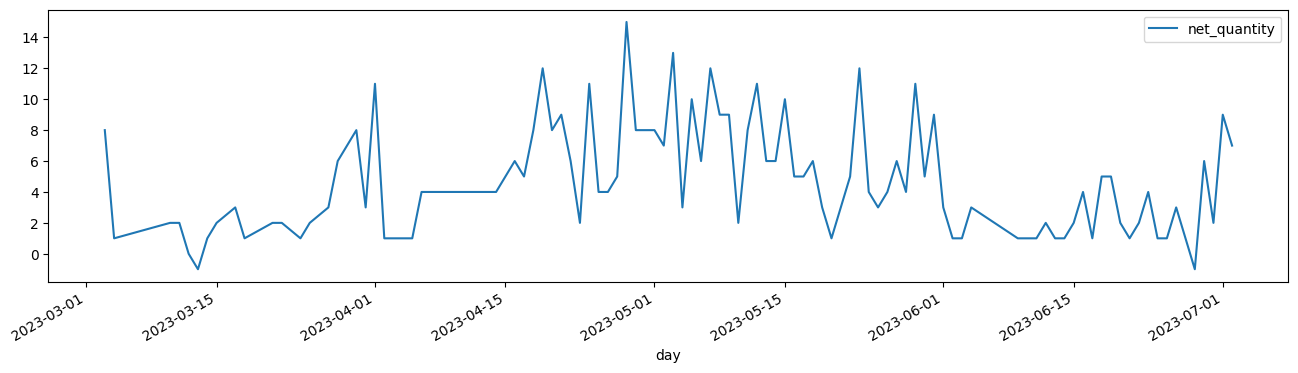

In [22]:

data_final.plot(figsize=(16,4))

In [24]:
!pip install statsmodels -q

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
adfuller(data_final['net_quantity'])

(-3.7691304595131796,
 0.0032394210466923524,
 1,
 100,
 {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349},
 457.63473373330567)

In [26]:
from statsmodels.tsa.ar_model import AutoReg

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

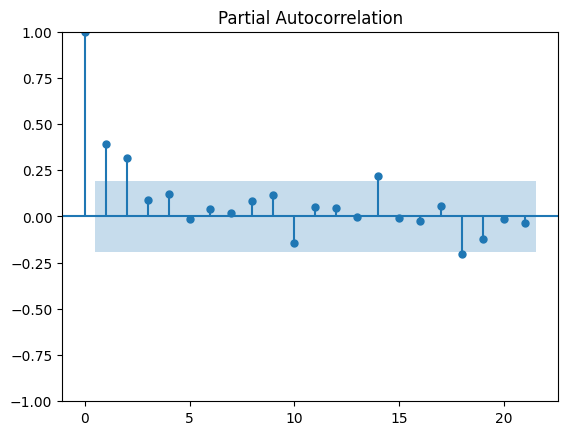

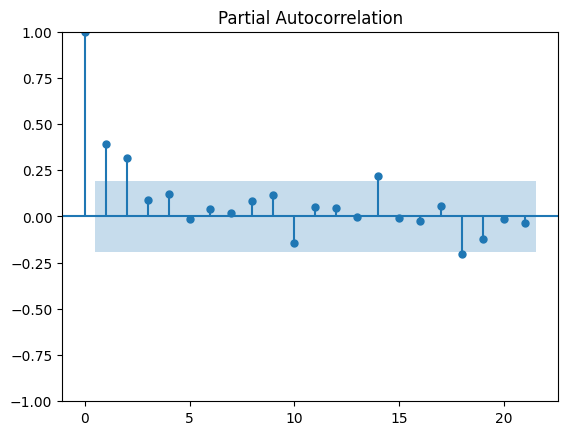

In [28]:
plot_pacf(data_final['net_quantity'])

In [29]:
data_final.shape

(102, 1)

In [30]:
train=data_final[:-10]
test=data_final[-10:]

In [31]:
ar_model=AutoReg(train,lags=2).fit()

C:\Users\Shubham\anaconda3\envs\ml_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [165]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:           net_quantity   No. Observations:                   92
Model:                     AutoReg(2)   Log Likelihood                -228.378
Method:               Conditional MLE   S.D. of innovations              3.061
Date:                Mon, 31 Jul 2023   AIC                            464.755
Time:                        17:11:51   BIC                            474.754
Sample:                             2   HQIC                           468.787
                                   92                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8858      0.614      3.069      0.002       0.682       3.090
net_quantity.L1     0.2929      0.099      2.963      0.003       0.099       0.487
net_quantity.L2     0.3087      0.099      3.117      0.002       0.115       0.503
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3868           +0.0000j            1.3868            0.0000
AR.2           -2.3355           +0.0000j            2.3355            0.5000
-----------------------------------------------------------------------------
"""

In [166]:
predict_ar=ar_model.predict(start=len(train),end=data_final.shape[0]-1,dynamic=False)

In [167]:
predict_ar.values

array([2.78040498, 3.31774837, 3.71609466, 3.99868146, 4.20444501,
       4.35196511, 4.45870558, 4.53551839, 4.5909742 , 4.63093404])

In [168]:
test.values.reshape((1,-1)).flatten()

array([ 4,  1,  1,  3,  1, -1,  6,  2,  9,  7], dtype=int64)

In [169]:
from matplotlib import pyplot as plt

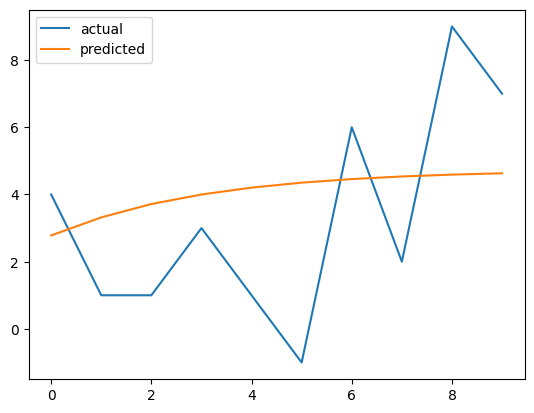

In [170]:
plt.plot(test.values.reshape((1,-1)).flatten(),label='actual')
plt.plot(predict_ar.values,label='predicted')

plt.legend(loc='upper left')
plt.show()

In [171]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [172]:
rmse_ar=sqrt(mean_squared_error(test.values.reshape((1,-1)).flatten(),predict_ar.values))

In [173]:
predict_ar.values.mean()

4.058547179659461

In [174]:
rmse_ar

2.9665186114512716

note : here rmse is not in range of 10% of mean hence bad prediction

## ARIMA Model

In [175]:
from pmdarima import auto_arima

In [176]:
data_final.head()

,net_quantity
day,
2023-03-03,8
2023-03-04,1
2023-03-10,2
2023-03-11,2
2023-03-12,0


In [177]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
stepwise_fit=auto_arima(data_final['net_quantity'],trace=True,supress_warning=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=527.690, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=550.191, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=534.904, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=541.987, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=650.562, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=526.637, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=533.744, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=525.162, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=526.449, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=525.849, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=527.816, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.465 seconds


In [74]:
from statsmodels.tsa.arima.model import ARIMA

In [178]:
model_arima=ARIMA(train['net_quantity'],order=(1,0,1)).fit()

In [179]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           net_quantity   No. Observations:                   92
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -233.590
Date:                Mon, 31 Jul 2023   AIC                            475.179
Time:                        17:12:28   BIC                            485.266
Sample:                             0   HQIC                           479.250
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4727      1.406      3.182      0.001       1.718       7.228
ar.L1          0.9135      0.076     11.993      0.000       0.764       1.063
ma.L1         -0.6794      0.133     -5.117      0.000      -0.940      -0.419
sigma2         9.3460      1.450      6.446      0.000       6.504      12.188
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 9.29
Prob(Q):                              0.90   Prob(JB):                         0.01
Heteroskedasticity (H):               1.07   Skew:                             0.74
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [180]:
predict_arima=model_arima.predict(start=len(train),end=data_final.shape[0]-1,dynamic=False)

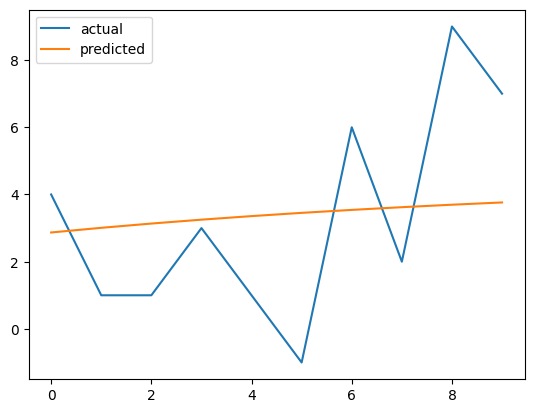

In [181]:
plt.plot(test.values.reshape((1,-1)).flatten(),label='actual')
plt.plot(predict_arima.values,label='predicted')

plt.legend(loc='upper left')
plt.show()

In [182]:
rmse_arima=sqrt(mean_squared_error(test.values.reshape((1,-1)).flatten(),predict_arima.values))
rmse_arima

2.874115992900233

In [183]:
predict_arima.values.mean()

3.3691676518668743

## TSA By ML

In [184]:
data_final

,net_quantity
day,
2023-03-03,8
2023-03-04,1
2023-03-10,2
2023-03-11,2
2023-03-12,0
...,...
2023-06-28,-1
2023-06-29,6
2023-06-30,2


In [87]:
df_ml=data_final.copy()

In [90]:
df_ml['last_month']=df_ml['net_quantity'].shift(1)

In [92]:
df_ml['last_2_month']=df_ml['net_quantity'].shift(2)

In [93]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

In [94]:
lin_model=LinearRegression()

In [95]:
rfr_model=RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)

In [97]:
df_ml.dropna(axis=0,inplace=True)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
df_ml.columns

Index(['net_quantity', 'last_month', 'last_2_month'], dtype='object')

In [103]:
x_train,x_test,y_train,y_test=train_test_split(df_ml[['last_month','last_2_month']],df_ml['net_quantity'],test_size=0.2)

In [104]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [105]:
rfr_model.fit(x_train,y_train)

RandomForestRegressor(max_features=3, random_state=1)

In [107]:
lin_predict=lin_model.predict(x_test)
rfr_predict=rfr_model.predict(x_test)

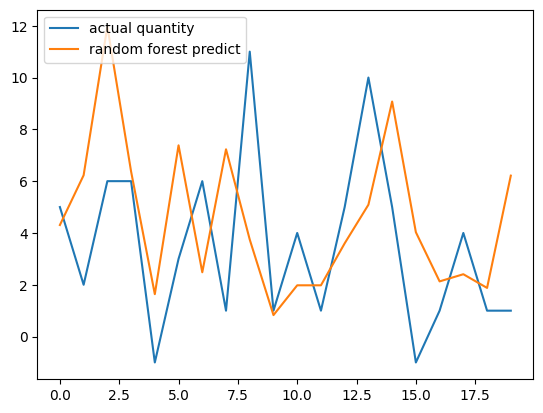

In [115]:
plt.plot(y_test.values,label='actual quantity')
# plt.plot(lin_predict,label='linear reg predict')
plt.plot(rfr_predict,label='random forest predict')

plt.legend(loc='upper left')
plt.show()

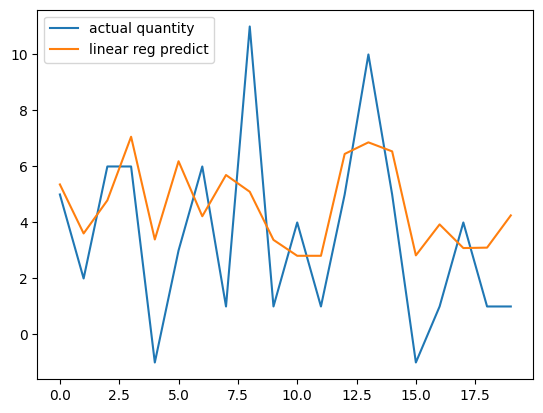

In [131]:
plt.plot(y_test.values,label='actual quantity')
plt.plot(lin_predict,label='linear reg predict')
# plt.plot(rfr_predict,label='random forest predict')

plt.legend(loc='upper left')
plt.show()

In [112]:
lin_model.score(x_test,lin_predict)

1.0

In [113]:
lin_model.score(x_test,rfr_predict)

0.3231217032025906

In [122]:
y_test.values

array([ 5,  2,  6,  6, -1,  3,  6,  1, 11,  1,  4,  1,  5, 10,  5, -1,  1,
        4,  1,  1], dtype=int64)

In [123]:
rfr_predict

array([ 4.30666667,  6.228     , 11.97133333,  6.373     ,  1.63707937,
        7.38333333,  2.48211905,  7.23      ,  3.74459524,  0.82894444,
        1.97935317,  1.97935317,  3.6       ,  5.09      ,  9.074     ,
        4.02847619,  2.13016667,  2.40688262,  1.87854762,  6.213     ])

In [124]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [133]:
print('the rmse for fandom forest  is',sqrt(mean_squared_error(y_test.values,rfr_predict)))

the rmse for fandom forest  is 3.8008867312441885


In [134]:
print('the rmse for linear regression  is',sqrt(mean_squared_error(y_test.values,lin_predict)))

the rmse for linear regression  is 2.8154633888075824


In [135]:
print('mean of testing values is ',y_test.values.mean())

mean of testing values is  3.55


## time series analysis using RNN (LSTM)

In [32]:
df_lstm=data_final.copy()

In [33]:
df_lstm['net_quantity'].shape

(102,)

<Axes: xlabel='day'>

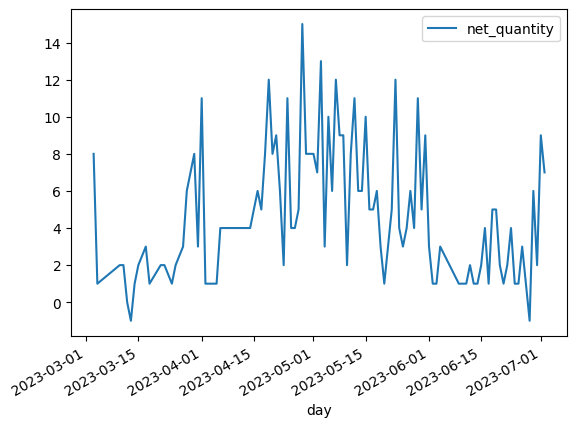

In [34]:
df_lstm.plot()

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [36]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [63]:
n_input=7

In [64]:
n_features=1

In [39]:
generator=TimeseriesGenerator(train['net_quantity'],train['net_quantity'],length=n_input,batch_size=1)

In [40]:
generator[0]

(array([[ 8,  1,  2,  2,  0, -1,  1,  2,  3,  1,  2,  2,  1,  2,  3]],
       dtype=int64),
 array([6], dtype=int64))

In [41]:
generator[1]

(array([[ 1,  2,  2,  0, -1,  1,  2,  3,  1,  2,  2,  1,  2,  3,  6]],
       dtype=int64),
 array([7], dtype=int64))

In [42]:
model_lstm=Sequential()

In [43]:
model_lstm.add(LSTM(100,activation='relu',input_shape=(n_input,1)))

In [44]:
model_lstm.add(Dense(1))

In [45]:
model_lstm.compile(optimizer='adam',loss='mse')

In [46]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_lstm.fit(generator,epochs=50)

Epoch 1/50
77/77 [==============================] - 2s 4ms/step - loss: 21.0132
Epoch 2/50
77/77 [==============================] - 0s 4ms/step - loss: 14.3712
Epoch 3/50
77/77 [==============================] - 0s 4ms/step - loss: 16.0142
Epoch 4/50
77/77 [==============================] - 1s 7ms/step - loss: 12.3268
Epoch 5/50
77/77 [==============================] - 0s 4ms/step - loss: 11.1015
Epoch 6/50
77/77 [==============================] - 1s 7ms/step - loss: 11.5672
Epoch 7/50
77/77 [==============================] - 0s 6ms/step - loss: 11.4648
Epoch 8/50
77/77 [==============================] - 0s 4ms/step - loss: 11.4483
Epoch 9/50
77/77 [==============================] - 1s 8ms/step - loss: 11.0887
Epoch 10/50
77/77 [==============================] - 0s 4ms/step - loss: 11.2592
Epoch 11/50
77/77 [==============================] - 0s 4ms/step - loss: 10.6402
Epoch 12/50
77/77 [==============================] - 0s 4ms/step - loss: 10.5624
Epoch 13/50
77/77 [==================

In [48]:
loss_per_epoch=model_lstm.history.history['loss']

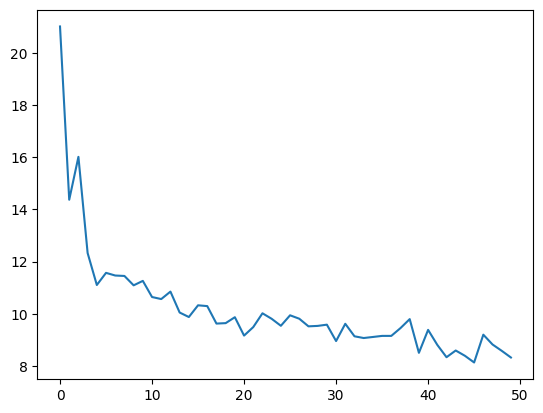

In [49]:
from matplotlib import pyplot as plt
plt.plot(loss_per_epoch)

In [50]:
last_train=train[-n_input:]

In [51]:
last_train

,net_quantity
day,
2023-06-04,3
2023-06-09,1
2023-06-10,1
2023-06-11,1
2023-06-12,2
2023-06-13,1
2023-06-14,1
2023-06-15,2
2023-06-16,4


In [52]:
model_lstm.predict(last_train.values.reshape((1,n_input)))

1/1 [==============================] - 0s 180ms/step


array([[2.0901532]], dtype=float32)

In [53]:
test['net_quantity'].values[0]

4

In [54]:
de=last_train.values.reshape((1,n_input))

In [236]:
np.append(de[:,1:],200)

array([  1,   2, 200], dtype=int64)

In [233]:
de

array([[2, 1, 2]], dtype=int64)

In [60]:
np.append(a[:,1:],3)

array([1, 2, 3])

In [64]:
n_input

3

In [71]:
for i in test.values.reshape(1,-1)[0]:
    print(i)

4
1
1
3
1
-1
6
2
9
7


In [73]:
model_lstm.predict(a)[0][0]

1/1 [==============================] - 0s 19ms/step


6.9919934

In [56]:
last_train.values.reshape(1,-1)

array([[3, 1, 1, 1, 2, 1, 1, 2, 4, 1, 5, 5, 2, 1, 2]], dtype=int64)

In [57]:
arr=[]
a=np.array([[3, 1, 1, 1, 2, 1, 1, 2, 4, 1, 5, 5, 2, 1, 2]])
for i in range(test.shape[0]):
    
    ans=model_lstm.predict(a)[0][0]
    a=np.append(a[:,1:],ans).reshape(1,n_input)
    print(a,ans)
    arr.append(ans)
    

1/1 [==============================] - 0s 154ms/step
[[1.         1.         1.         2.         1.         1.
  2.         4.         1.         5.         5.         2.
  1.         2.         2.09015322]] 2.0901532
1/1 [==============================] - 0s 270ms/step
[[1.         1.         2.         1.         1.         2.
  4.         1.         5.         5.         2.         1.
  2.         2.09015322 2.06531906]] 2.065319
1/1 [==============================] - 0s 15ms/step
[[1.         2.         1.         1.         2.         4.
  1.         5.         5.         2.         1.         2.
  2.09015322 2.06531906 2.30520797]] 2.305208
1/1 [==============================] - 0s 23ms/step
[[2.         1.         1.         2.         4.         1.
  5.         5.         2.         1.         2.         2.09015322
  2.06531906 2.30520797 2.60057878]] 2.6005788
1/1 [==============================] - 0s 17ms/step
[[1.         1.         2.         4.         1.         5.
  5.

In [58]:
test.shape

(10, 1)

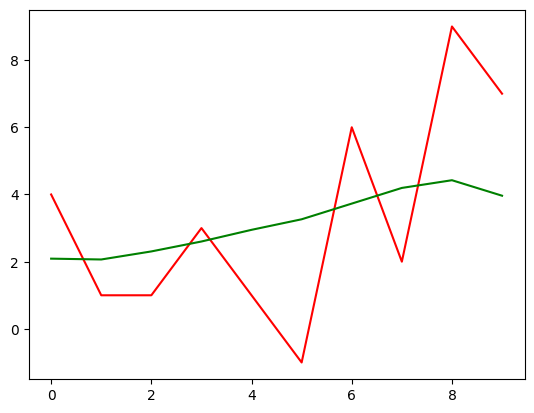

In [59]:
plt.plot(test.values,label="actual values",c='r')
plt.plot(arr,label='predicted values',c='g')

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [61]:
rmse_rnn=sqrt(mean_squared_error(test.values,arr))
mean_rnn=test.values.mean()

In [62]:
print(rmse_rnn,mean_rnn)

2.6218000130019736 3.3


## VAR Model

In [88]:
df_new

,net_quantity,discount
day,,
2023-03-03,8,0.000000
2023-03-04,1,0.000000
2023-03-10,2,0.000000
2023-03-11,2,0.000000
2023-03-12,0,0.000000
...,...,...
2023-06-28,-1,0.000000
2023-06-29,6,0.058333
2023-06-30,2,0.000000


In [89]:
from statsmodels.tsa.stattools import adfuller

In [92]:
adfuller(df_new['net_quantity'])

(-3.7691304595131796,
 0.0032394210466923524,
 1,
 100,
 {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349},
 457.63473373330567)

In [96]:
adfuller(df_new['discount'])

(-3.40875260265579,
 0.010664090262727677,
 1,
 100,
 {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349},
 -269.463618526398)

<Axes: xlabel='day'>

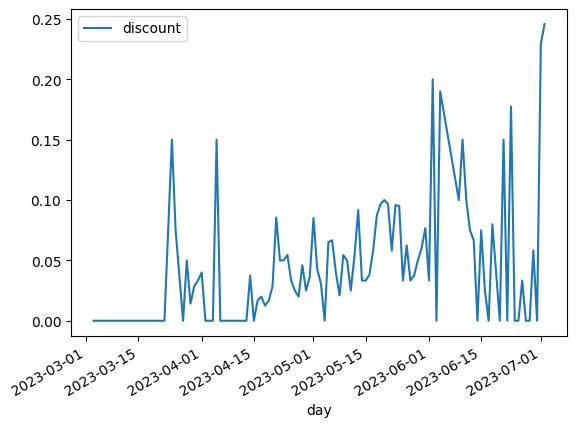

In [95]:
df_new[['discount']].plot()

In [105]:
df_new.columns

Index(['net_quantity', 'discount'], dtype='object')

In [106]:
df_new.head()

,net_quantity,discount
day,,
2023-03-03,8,0.0
2023-03-04,1,0.0
2023-03-10,2,0.0
2023-03-11,2,0.0
2023-03-12,0,0.0


## Facebook Pro

In [113]:
df_fp=data_final.copy()

In [114]:
df_fp.reset_index(inplace=True)

In [117]:
df_fp.columns=['ds','y']

In [118]:
df_fp.head()

,ds,y
0,2023-03-03,8
1,2023-03-04,1
2,2023-03-10,2
3,2023-03-11,2
4,2023-03-12,0


In [123]:
import prophet

In [122]:
!pip install plotly -q

In [129]:
df_fp.iloc[:-10,:]

,ds,y
0,2023-03-03,8
1,2023-03-04,1
2,2023-03-10,2
3,2023-03-11,2
4,2023-03-12,0
...,...,...
87,2023-06-18,5
88,2023-06-19,5
89,2023-06-20,2
90,2023-06-21,1


In [147]:

model_p = prophet.Prophet()

# Fit the model
model_p.fit(df_fp.iloc[:-10,:])



18:12:19 - cmdstanpy - INFO - Chain [1] start processing
18:12:19 - cmdstanpy - INFO - Chain [1] done processing


In [148]:
# Make predictions
future = model_p.predict(df_fp.tail(10))

# # Plot the predictions
# model_p.plot(future)

In [149]:
fb_pred=future['yhat'].values

In [150]:
fp_actual=df_fp.iloc[-10:,:]['y'].values

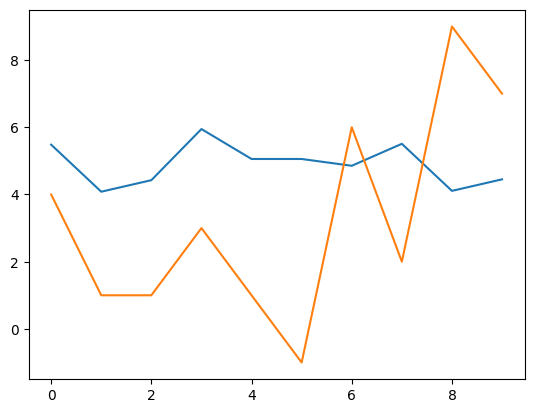

In [151]:
plt.plot(fb_pred)
plt.plot(fp_actual)

In [153]:
sqrt(mean_squared_error(fb_pred,fp_actual))

3.5958674426995603

In [154]:
fp_actual.mean()

3.3